# EDSR

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import sys
import os
sys.path.append(os.path.abspath('/content/drive/My Drive/Colab Notebooks/super-resolution'))

In [3]:
import os
import matplotlib.pyplot as plt

from model.edsr import edsr
# from train import EdsrTrainer
import tensorflow as tf
tf.enable_eager_execution()

%matplotlib inline

In [0]:
# Number of residual blocks
depth = 16

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [0]:
# Location of model weights (needed for demo)
weights_dir = '/content/drive/My Drive/Colab Notebooks/super-resolution/weights/EDSR/'
weights_file = lambda filename: os.path.join(weights_dir, filename)

os.makedirs(weights_dir, exist_ok=True)

# Run the project

### EDSR: training on pretrained weights and single resolution function

In [0]:
model = edsr(scale=scale, num_res_blocks=depth)
model.load_weights(weights_file('weights.h5'))

In [0]:
from model import resolve_single
from utils import load_image, plot_sample
import cv2

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)

    plt.figure(figsize=(20, 20))
    
    images = [lr, sr]
    titles = ['LR', 'EDSR']
    positions = [1, 2]
    
    for i, (img, title, pos) in enumerate(zip(images, titles, positions)):
        plt.subplot(2, 2, pos)
        plt.imshow(img)
        plt.title(title)
        plt.xticks([])
        plt.yticks([])

def save_picture(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)

    cv2.imwrite('/content/drive/My Drive/Colab Notebooks/super-resolution/output/picture_edsr.jpg', sr.numpy())

# Experiments

In [0]:
example_dir = '/content/drive/My Drive/Colab Notebooks/super-resolution/demo'

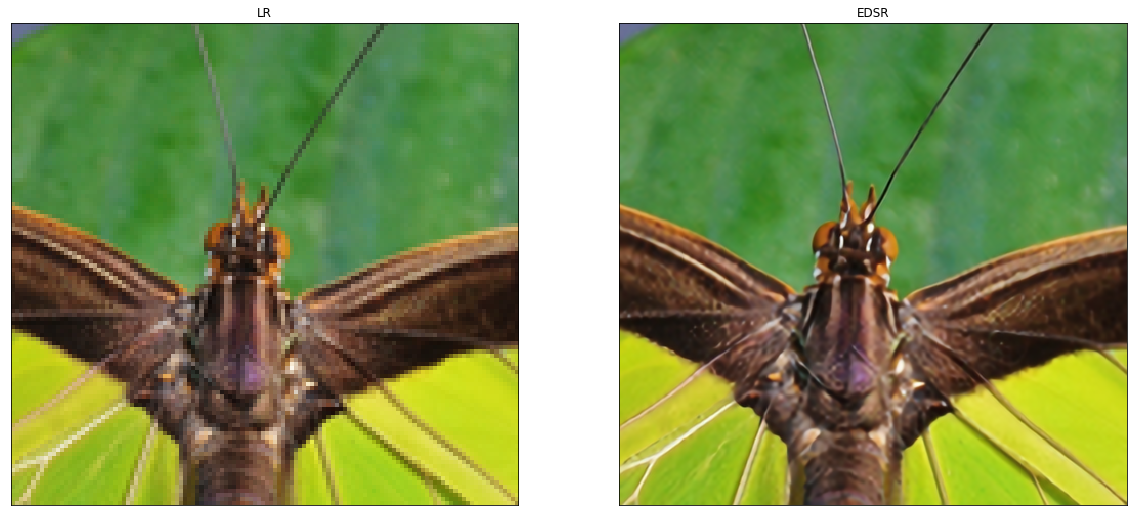

In [9]:
resolve_and_plot(os.path.join(example_dir, '0829x4-crop.png'))

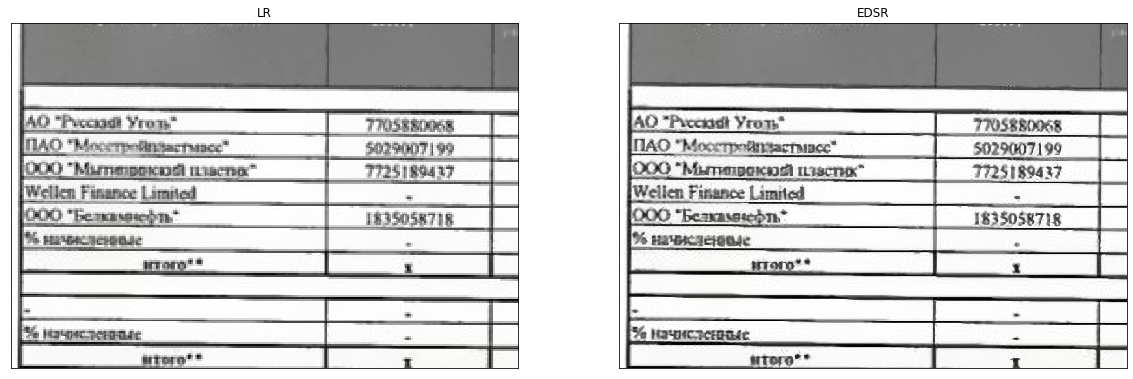

In [10]:
resolve_and_plot(os.path.join(example_dir, 'rt.jpg'))
save_picture(os.path.join(example_dir, 'rt.jpg'))